In [57]:
import os, logging, gensim
import numpy as np
import pandas as pd
from sklearn import linear_model
import unicodedata as ud
import copy

In [58]:
# Global configuration
lang = 'French_POS'
include_pos = True
root_path = './' + lang + '/'

if lang == 'French':
    sim_model_path = root_path + 'wolf_15k_850d.txt'
    mix_model_path = root_path + 'depglove_200d_eric.txt'
    asn_model_path = root_path + 'asn_embedding.txt'
    sig_model_path = root_path + 'sig_embedding.txt'
elif lang == 'French_POS':
    sim_model_path = root_path + 'wolf_pos_850d.txt'
    mix_model_path = root_path + 'depglove_200d_eric.txt'
    asn_model_path = root_path + 'asn_embedding_24519.txt'
    sig_model_path = root_path + 'sig_embedding.txt'
elif lang == 'English':
    sim_model_path = root_path + 'sim_embedding.txt'
    mix_model_path = root_path + 'glove.840B.300d.txt'
    asn_model_path = root_path + 'asn_embedding.txt'
    sig_model_path = root_path + 'sig_embedding.txt'


In [59]:
import os, logging, gensim
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib import cm
import gensim
from scipy.signal import savgol_filter

In [79]:
# LaTeX configure
plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif', 'serif':['Palatino']})

# Dimension Selection 

In [6]:
sim_model_origin = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_230119/Normalized_random_walk.npy')
sim_origin_fr = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_140219_all/Normalized_random_walk.npy')

In [ ]:
pca = PCA(n_components=8000, svd_solver='randomized')
pca_sim_o = pca.fit(sim_model_origin)
var_cum = np.cumsum(pca_sim_o.explained_variance_ratio_)

In [ ]:
pca_fr = PCA(n_components=8000, svd_solver='randomized')
pca_sim_o_fr = pca_fr.fit(sim_origin_fr)
var_cum_fr = np.cumsum(pca_sim_o_fr.explained_variance_ratio_)

In [5]:
# np.save('pca_sim_fr_all.npy', pca_sim_o_fr)
# np.save('pca_sim_en_all.npy', pca_sim_o)
pca_sim_o_fr = np.load('pca_sim_fr_all.npy')
pca_sim_o = np.load('pca_sim_en_all.npy')

In [6]:
pca_sim_o_fr = pca_sim_o_fr.item()
pca_sim_o = pca_sim_o.item()

/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


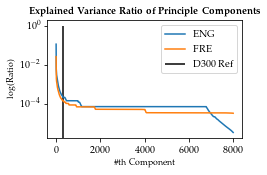

In [18]:
f = plt.figure(figsize=(3.49, 2.16))
plt.yscale('log')
#plt.plot(var_cum)
plt.plot(pca_sim_o.explained_variance_ratio_, label='ENG')
plt.plot(pca_sim_o_fr.explained_variance_ratio_, label='FRE')
plt.vlines(x=300, ymax=1, ymin=0, label='D300 Ref')
plt.legend()
plt.title(r'\textbf{Explained Variance Ratio of Principle Components}', fontsize=10)
plt.ylabel(r'log(Ratio)', fontsize=9)
plt.xlabel(r'\#th Component', fontsize=9)
plt.show()

f.savefig("SimDimensionSelectionVarRatio.pdf", bbox_inches='tight')

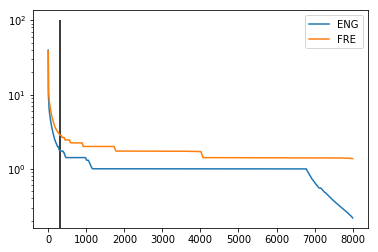

In [28]:
plt.yscale('log')
#plt.plot(var_cum)
plt.plot(pca_sim_o.singular_values_, label='ENG')
plt.plot(pca_sim_o_fr.singular_values_, label='FRE')
plt.vlines(x=300, ymax=100, ymin=0)
plt.legend()
plt.show()

In [80]:
# Word Alignment in two embeddings
file = open(sim_model_path, mode='r')
voc, dim = file.readline().split(' ')
voc = int(voc)
dim_sim = int(dim)

file_data = file.readlines()
file.close()

vocabulary = dict()
idx = 0
sim_model = np.zeros((voc, dim_sim), dtype=np.float32)
word_list = []

for line in file_data:
    vector = line.split(' ')
    word_list.append(vector[0])
    vocabulary[vector[0]] = idx
    sim_model[idx,:] = vector[1:]
    idx += 1

In [195]:
pca_sim_o = np.load('./pca_sim_en_all.npy')

In [203]:
pca_sim_o = pca_sim_o.item()

/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


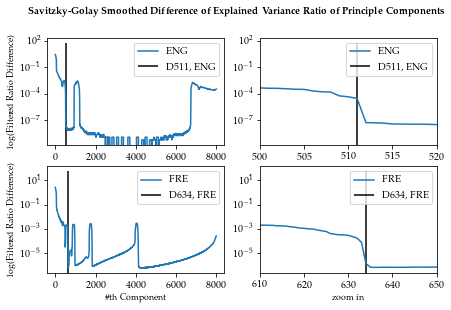

In [41]:
f, ax = plt.subplots(2, 2, figsize=(3.49 * 2, 2.16 * 2), sharey=False)

en_eig_dif = np.array(pca_sim_o.singular_values_)
en_eig_dif[1:] = en_eig_dif[:-1] - en_eig_dif[1:]
yhat = savgol_filter(en_eig_dif, 101, 1)

fr_eig_dif = np.array(pca_sim_o_fr.singular_values_)
fr_eig_dif[1:] = fr_eig_dif[:-1] - fr_eig_dif[1:]
yhat2 = savgol_filter(fr_eig_dif, 101, 1)
#plt.plot(var_cum)
# plt.plot(fr_eig_dif_smoothed, label='FRE')
dim_sim_eng = 511
dim_sim_fre = 634
ax[0, 0].set_yscale('log')
ax[0, 1].set_yscale('log')
#plt.plot(var_cum)
ax[0, 0].plot(yhat, label='ENG')
ax[1, 0].plot(yhat2, label='FRE')
ax[0, 0].vlines(x=dim_sim_eng, ymax=60, ymin=0, label='D511, ENG')
ax[1, 0].vlines(x=dim_sim_fre, ymax=60, ymin=0, label='D634, FRE')



ax[1, 0].set_yscale('log')
ax[1, 1].set_yscale('log')
#plt.plot(var_cum)
ax[0, 1].plot(yhat, label='ENG')
ax[1, 1].plot(yhat2, label='FRE')
ax[0, 1].vlines(x=dim_sim_eng, ymax=60, ymin=0, label='D511, ENG')
ax[1, 1].vlines(x=dim_sim_fre, ymax=60, ymin=0, label='D634, FRE')
ax[0, 1].set_xlim(500,520)
ax[1, 1].set_xlim(610,650)
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()

plt.suptitle(r'\textbf{Savitzky-Golay Smoothed Difference of Explained Variance Ratio of Principle Components}', fontsize=10)
ax[0, 0].set_ylabel(r'log(Filtered Ratio Difference)', fontsize=9)
ax[1, 0].set_ylabel(r'log(Filtered Ratio Difference)', fontsize=9)
ax[1, 0].set_xlabel(r'\#th Component', fontsize=9)
ax[1, 1].set_xlabel(r'zoom in', fontsize=9)
f.savefig("SimDimensionSelectionVarRatioDiff.pdf", bbox_inches='tight')
plt.show()

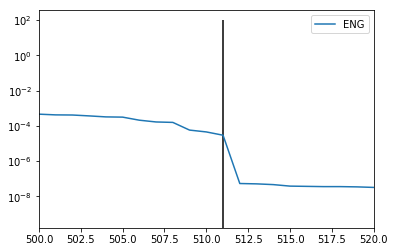

In [206]:
dim_sim_eng = 511
plt.yscale('log')
#plt.plot(var_cum)
plt.plot(yhat, label='ENG')
plt.vlines(x=dim_sim_eng, ymax=100, ymin=0)
plt.xlim(500,520)
plt.legend()
plt.show()

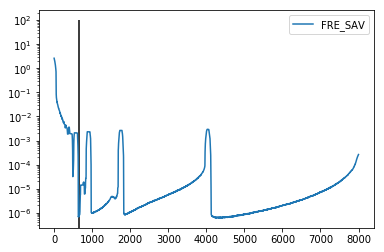

In [96]:
fr_eig_dif = np.array(pca_sim_o_fr.singular_values_)
fr_eig_dif[1:] = fr_eig_dif[:-1] - fr_eig_dif[1:]
fr_eig_dif_smoothed = (fr_eig_dif[:-3] + fr_eig_dif[1:-2] + fr_eig_dif[2:-1] + fr_eig_dif[3:])/4
yhat = savgol_filter(fr_eig_dif, 101, 1)
plt.yscale('log')
#plt.plot(var_cum)
# plt.plot(fr_eig_dif_smoothed, label='FRE')
plt.plot(yhat, label='FRE_SAV')
plt.vlines(x=650, ymax=100, ymin=0)
plt.legend()
plt.show()

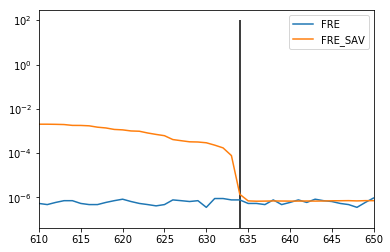

In [99]:
dim_sim_fre = 634
plt.yscale('log')
#plt.plot(var_cum)
plt.xlim(610,650)
plt.plot(fr_eig_dif_smoothed, label='FRE')
plt.plot(yhat, label='FRE_SAV')
plt.vlines(x=634, ymax=100, ymin=0)
plt.legend()
plt.show()

In [16]:
if lang == 'French':
    file = open(mix_model_path, mode='r', encoding="cp1252")
if lang == 'English':
    file = open(mix_model_path, mode='r')
file_data = file.readlines()
file.close()

In [23]:
voc, dim_mix = file_data[0].split()
if lang == 'English':
    mix_model = np.zeros((int(voc), int(dim_mix)), dtype=np.float32)
    vocabulary = []
    for line in file_data[1:]:
        vector = line.split(' ')
        mix_model[len(vocabulary),:] = vector[1:]
        vocabulary.append(vector[0])
        
        

In [26]:
#pca = PCA(n_components=300, svd_solver='randomized')
#pca_mix_o = pca.fit_transform(mix_model)


AttributeError: module 'pandas' has no attribute 'Dataframe'

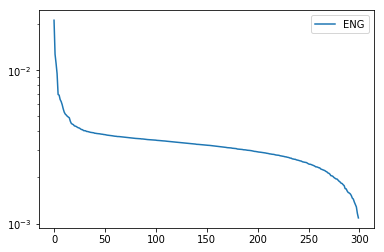

In [31]:
plt.yscale('log')
#plt.plot(var_cum)
plt.plot(pca.explained_variance_ratio_, label='ENG')
plt.legend()
plt.show()

# Generate Embeddings

In [5]:
# Global configuration
lang = 'English'
root_path = '/home/sying/Documents/Decorrelation/' + lang + '/'

if lang == 'French':
    sim_model_path = root_path + 'wolf_15k_850d.txt'
    mix_model_path = root_path + 'depglove_200d_eric.txt'
    asn_model_path = root_path + 'asn_embedding.txt'
    sig_model_path = root_path + 'sig_embedding.txt'
elif lang == 'English':
    sim_model_path = root_path + 'sim_embedding.txt'
    mix_model_path = root_path + 'glove_840B_300d.txt'
    asn_model_path = root_path + 'asn_embedding_511.txt'
    sig_model_path = root_path + 'sig_embedding_511.txt'


In [105]:
dim = dim_sim_eng
word_list = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_230119/word_list.npy')
pca_sim_o = pca_sim_o.fit_transform(sim_model_origin)
file = open(root_path + 'sim_15k_'+ str(dim) +'d.txt', mode='w+')
file.write(str(len(word_list)) + ' ' + str(dim) + '\n')
for idx, word in enumerate(word_list):
    file.write(word + ' ')
    file.write(' '.join(map(str, pca_sim_o[idx, :dim_sim_eng])))
    file.write('\n')
file.close()

In [109]:
ref_model = ["wordsim_rel.csv", "simlex999.csv"]

model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'sim_15k_'+ str(dim) +'d.txt', binary=False)
for ref in ref_model:
    print ("ref: %s---dim: %d---------------------"%(ref, dim))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/English_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])     
    # print("OOV", res[2])        

ref: wordsim_rel.csv---dim: 511---------------------
Pearson, r 0.027953538301716298 p 0.6626289849553657
Spearman, r 0.019334207436002393 p 0.7628587295076241
ref: simlex999.csv---dim: 511---------------------
Pearson, r 0.5060569631973371 p 5.995162912635793e-66
Spearman, r 0.49887683715274217 p 7.405558598896457e-64


In [4]:
# Global configuration
lang = 'French_POS'
root_path = '/home/sying/Documents/Decorrelation/' + lang + '/'


In [117]:
dim = dim_sim_fre
word_list = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_140219_all/word_list_FR_POS_ALL.npy')
pca_sim_o = pca_sim_o_fr.transform(sim_origin_fr)
file = open(root_path + 'sim_15k_'+ str(dim) +'d.txt', mode='w+')
file.write(str(len(word_list)) + ' ' + str(dim) + '\n')
for idx, word in enumerate(word_list):
    file.write(word + ' ')
    file.write(' '.join(map(str, pca_sim_o[idx, :dim])))
    file.write('\n')
file.close()

In [276]:
ref_model = ["fr-pos-wsrel.dataset", "fr-pos-simlex.dataset"]

model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'sim_15k_634d.txt', binary=False)
for ref in ref_model:
    print ("ref: %s---dim: %d---------------------"%(ref, dim))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/French_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])     
    # print("OOV", res[2])        

ref: fr-pos-wsrel.dataset---dim: 300---------------------


/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Pearson, r 0.10390990957941862 p 0.10613322593026263
Spearman, r 0.051152611689551944 p 0.4273126934361545
ref: fr-pos-simlex.dataset---dim: 300---------------------
Pearson, r 0.32910498528693743 p 5.571000169726239e-25
Spearman, r 0.2812101536274285 p 2.1215623361628103e-18


# Decorrelation

In [10]:
dim_sim_eng = 511
lang = 'English'
root_path = '/home/sying/Documents/Decorrelation/' + lang + '/'
dim = dim_sim_eng
word_list = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_230119/word_list.npy')
vocabulary = {value: idx for idx, value in enumerate(word_list)}

In [11]:
file = open(root_path + 'sim_15k_511d.txt', mode='r')
file_data = file.readlines()
file.close()
voc, dim = file_data[0].split()
sim_model = np.zeros((int(voc), int(dim)), dtype=np.float32)

In [12]:
for idx, line in enumerate(file_data[1:]):
    data = line.split()
    sim_model[idx, :] = data[1:] 

In [13]:
if lang == 'French':
    file = open(mix_model_path, mode='r', encoding="cp1252")
if lang == 'English':
    file = open(mix_model_path, mode='r')
file_data = file.readlines()
file.close()

In [14]:
word_list = np.load('/home/sying/Documents/WordNetEmbeddings/data/output_230119/word_list.npy')

In [15]:
dim_mix_eng = int(file_data[0].split()[1])
mix_model = np.zeros((len(word_list), dim_mix_eng), dtype=np.float32)

In [16]:
for line in file_data[1:]:
    data = line.split()
    if data[0] in vocabulary:
        idx = vocabulary.pop(data[0])
        mix_model[idx, :] = data[1:]

In [17]:
vocabulary_mask = np.ones(int(voc), dtype=np.bool)
vocabulary_mask[list(vocabulary.values())] = 0

sim_model_red = sim_model[vocabulary_mask,:]
mix_model_red = mix_model[vocabulary_mask,:]

In [170]:
asn_model_red.shape

(8157, 300)

In [19]:
sim_model_red.shape

(8157, 511)

In [180]:
len(vocabulary_mask), len(word_list)

(15000, 15000)

In [174]:
np.array(word_list)[vocabulary_mask]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4385 but corresponding boolean dimension is 15000

In [181]:
# Linear Decorrelation by projecting A emb. onto B emb.
dim_mix = dim_mix_eng
reg = linear_model.LinearRegression()
reg.fit(sim_model_red, mix_model_red)
score = reg.score(sim_model_red, mix_model_red)
print("Model mapping score: ", score)

asn_model_red = mix_model_red - reg.predict(sim_model_red)
word_list = [word_list[i] for i in range(len(word_list)) if vocabulary_mask[i]]
file = open(asn_model_path, mode='w')
file.write('{} {}\n'.format(len(word_list), dim_mix))
asn_model_df = pd.DataFrame(asn_model_red, index=word_list)
file.write(asn_model_df.to_csv(sep=' ', header=False))
file.close()

file = open(sig_model_path, mode='w')
file.write('{} {}\n'.format(len(word_list), dim_mix))
sig_model_red = reg.predict(sim_model_red)
sig_model_df = pd.DataFrame(sig_model_red, index=word_list)
file.write(sig_model_df.to_csv(sep=' ', header=False))
file.close()


Model mapping score:  0.16618268456109642


# De correlation check

In [155]:
# sim_model =  pd.read_csv('./French_POS/sim_56k_634d.txt', sep=' ', header=None, skiprows=1, index_col=0)
sim_model = pd.read_csv('./English/sim_15k_511d.txt', sep=' ', header=None, skiprows=1, index_col=0)

In [7]:
sig_model = pd.read_csv('./English/sig_embedding_511.txt', sep=' ', header=None, skiprows=1, index_col=0)

In [112]:
# asn_model = pd.read_csv('./English/asn_embedding_511.txt', sep=' ', header=None, skiprows=1, index_col=0)
asn_model = pd.read_csv('./French_POS/asn_embedding_24519.txt', sep=' ', header=None, skiprows=1, index_col=0)

In [156]:
pca = PCA(n_components=200, svd_solver='randomized')
#asn_model_pca = pca.fit_transform(asn_model)
sim_model_pca = pca.fit_transform(sim_model)
#pca_mix_o = pca.fit_transform(sig_model)

In [70]:
from mpl_toolkits.mplot3d import Axes3D

In [84]:
%matplotlib inline

/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


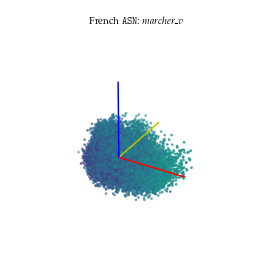

In [152]:
key_word = 'marcher_v'
key_word_title = r'marcher\_v'
key_index = asn_model.index.get_loc(key_word)
fig = plt.figure(figsize=(3.49, 3.49))

ax = Axes3D(fig) # Method 1

plt.axis('off')
max_val = asn_model_pca.max()
ax.plot([0, max_val], [0, 0], [0, 0], c='r', zorder=1)
ax.plot([0, 0], [0, max_val], [0, 0], c='y', zorder=1)
ax.plot([0, 0], [0, 0], [0, max_val], c='b', zorder=1)
score = asn_model.corrwith(asn_model.loc[key_word], axis=1)
ax.scatter(asn_model_pca[key_index, 0], asn_model_pca[key_index, 1], asn_model_pca[key_index, 2], c='r', marker='o', s=400, zorder=-1)

ax.scatter(asn_model_pca[:, 0], asn_model_pca[:, 1], asn_model_pca[:, 2], c=np.log10(score.values + 2), marker='o', s=3, zorder=2)
plt.title(r'French \texttt{ASN}: \emph{%s}' % key_word_title, fontsize=10)
plt.show()
fig.savefig("FreASNPCAfor{}.pdf".format(key_word), bbox_inches='tight')

/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


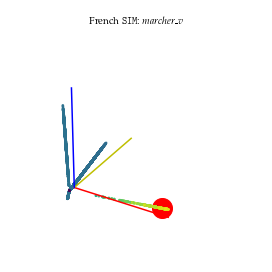

In [149]:
key_word = 'marcher_v'
key_word_title = r'marcher\_v'
key_index = sim_model.index.get_loc(key_word)
fig = plt.figure(figsize=(3.49, 3.49))

ax = Axes3D(fig) # Method 1

plt.axis('off')
max_val = sim_model_pca.max()
ax.plot([0, max_val], [0, 0], [0, 0], c='r', zorder=1)
ax.plot([0, 0], [0, max_val], [0, 0], c='y', zorder=1)
ax.plot([0, 0], [0, 0], [0, max_val], c='b', zorder=1)
score = sim_model.corrwith(sim_model.loc[key_word], axis=1)
ax.scatter(sim_model_pca[key_index, 0], sim_model_pca[key_index, 1], sim_model_pca[key_index, 2], c='r', marker='o', s=400, zorder=30)

ax.scatter(sim_model_pca[:, 0], sim_model_pca[:, 1], sim_model_pca[:, 2], c=np.log10(score.values + 2), marker='o', s=3, zorder=2)
plt.title(r'French \texttt{SIM}: \emph{%s}' % key_word_title, fontsize=10)
plt.show()
fig.savefig("FreSIMPCAfor{}.pdf".format(key_word), bbox_inches='tight')

/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


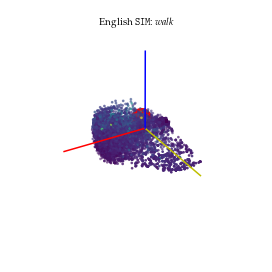

In [158]:
key_word = 'walk'
key_word_title = r'walk'
key_index = sim_model.index.get_loc(key_word)
fig = plt.figure(figsize=(3.49, 3.49))

ax = Axes3D(fig, azim=60) # Method 1

plt.axis('off')
max_val = sim_model_pca.max()
ax.plot([0, max_val], [0, 0], [0, 0], c='r', zorder=1)
ax.plot([0, 0], [0, max_val], [0, 0], c='y', zorder=1)
ax.plot([0, 0], [0, 0], [0, max_val], c='b', zorder=1)
score = sim_model.corrwith(sim_model.loc[key_word], axis=1)
ax.scatter(sim_model_pca[key_index, 0], sim_model_pca[key_index, 1], sim_model_pca[key_index, 2], c='r', marker='o', s=400, zorder=30)

ax.scatter(sim_model_pca[:, 0], sim_model_pca[:, 1], sim_model_pca[:, 2], c=np.log10(score.values + 2), marker='o', s=3, zorder=2)
plt.title(r'English \texttt{SIM}: \emph{%s}' % key_word_title, fontsize=10)
plt.show()
fig.savefig("EngSIMPCAfor{}.pdf".format(key_word), bbox_inches='tight')

In [68]:
asn_model_pca.shape

(8157, 300)

/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


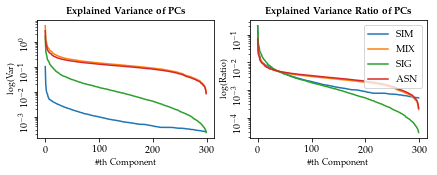

In [33]:
f, ax = plt.subplots(1, 2, figsize=(3.49 * 2, 2.16))

ax[0].set_yscale('log')
ax[1].set_yscale('log')
#plt.plot(pca.explained_variance_)
pca = PCA(n_components=300, svd_solver='full')
pca.fit(sim_model_red)
ax[0].plot(pca.explained_variance_, label='SIM')
ax[1].plot(pca.explained_variance_ratio_, label='SIM')

pca = PCA(n_components=300, svd_solver='full')
pca.fit(mix_model_red)
ax[0].plot(pca.explained_variance_, label='MIX')
ax[1].plot(pca.explained_variance_ratio_, label='MIX')
pca = PCA(n_components=300, svd_solver='full')
pca.fit(sig_model)
ax[0].plot(pca.explained_variance_, label='SIG')
ax[1].plot(pca.explained_variance_ratio_, label='SIG')
pca = PCA(n_components=300, svd_solver='full')
pca.fit(asn_model)
ax[0].plot(pca.explained_variance_, label='ASN')
ax[1].plot(pca.explained_variance_ratio_, label='ASN')
ax[1].legend(loc=1)
ax[0].set_title(r'\textbf{Explained Variance of PCs}', fontsize=10)
ax[1].set_title(r'\textbf{Explained Variance Ratio of PCs}', fontsize=10)
ax[0].set_ylabel(r'log(Var)', fontsize=9)
ax[0].set_xlabel(r'\#th Component', fontsize=9)
ax[1].set_ylabel(r'log(Ratio)', fontsize=9)
ax[1].set_xlabel(r'\#th Component', fontsize=9)
ax[1].tick_params(axis='y', labelrotation=90)
ax[0].tick_params(axis='y', labelrotation=90)
#ax[0].set_yticklabels(ax[0].get_yticklabels(), =90)

plt.show()

f.savefig("EngDecorVarRatio.pdf", bbox_inches='tight')

In [141]:
score_evo = {
    "wordsim_rel.csv": [],
    "simlex999.csv": []
}

In [187]:
ref_model = ["wordsim_rel.csv", "simlex999.csv"]
dim = 300

model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'sig_embedding_511.txt', binary=False)
for ref in ref_model:
    print ("ref: %s---dim: %d---------------------"%(ref, dim))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/English_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])     
    # score_evo[ref].append(res[1][0])
    # print("OOV", res[2])        

ref: wordsim_rel.csv---dim: 300---------------------
Pearson, r 0.18949474924783347 p 0.0028445584881911083
Spearman, r 0.14511719472311646 p 0.022813367126772895
ref: simlex999.csv---dim: 300---------------------
Pearson, r 0.48136123997514774 p 5.863737693616017e-59
Spearman, r 0.48918910654406567 p 4.111916841839331e-61


In [188]:
model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'asn_embedding_511.txt', binary=False)
for ref in ref_model:
    print ("ref: %s---dim: %d---------------------"%(ref, dim))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/English_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])     
    #score_evo[ref].append(res[1][0])
    # print("OOV", res[2])        

ref: wordsim_rel.csv---dim: 300---------------------
Pearson, r 0.5790335192055239 p 2.011894796738486e-23
Spearman, r 0.6038706304620574 p 7.773393094275475e-26
ref: simlex999.csv---dim: 300---------------------
Pearson, r 0.25266392489131945 p 5.509214351226265e-16
Spearman, r 0.253925714053347 p 3.9031256828536286e-16


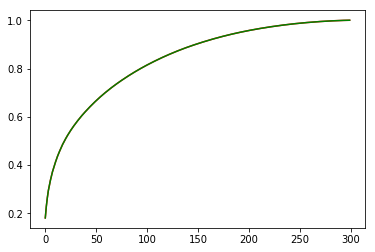

In [135]:
plt.plot(np.cumsum(pca_sig.explained_variance_ratio_), c='r')
plt.plot(np.cumsum(pca_asn.explained_variance_ratio_), c='g')
plt.show()

# French Deco

## Define key vocabulary items

In [34]:
lang = 'French_POS'
root_path = '/home/sying/Documents/Decorrelation/' + lang + '/'
os.getcwd()

'/home/sying/Documents/Decorrelation'

In [210]:
lpp_path = root_path + 'lpp_wolf_tuned_vocab.txt'
file = open(lpp_path, mode='r')
file_data = file.read()
lpp_voc = file_data.strip().split('\n')
lpp_voc = set(lpp_voc)

In [211]:
lpp_path = '../Similarity-Association-Benchmarks/fr-pos-wsrel.dataset'
wsrel_voc = pd.read_csv(lpp_path, delimiter=';', header=None).to_dict('list')
wsrel_voc = set(wsrel_voc[0]).union(wsrel_voc[1])

In [212]:
lpp_path = '../Similarity-Association-Benchmarks/fr-pos-simlex.dataset'
simlex_voc = pd.read_csv(lpp_path, delimiter=';', header=None).to_dict('list')
simlex_voc = set(simlex_voc[0]).union(simlex_voc[1])

In [213]:
relevant_voc = lpp_voc.union(wsrel_voc).union(simlex_voc)

In [214]:
len(relevant_voc)

2402

# Load Vocabularies

In [215]:
wolf_voc = open(root_path+'vocabulary_pos_wolf.txt', mode='r').read().split('\n')

In [216]:
glove_voc_raw = open(root_path+'vocabulary_depglove.txt', mode='r', encoding='utf8').read().split('\n')

## Clean WOLF vocabulary

In [67]:
latin_letters= {}

def is_latin(uchr):
    try: return latin_letters[uchr]
    except KeyError:
         return latin_letters.setdefault(uchr, 'LATIN' in ud.name(uchr))

def only_roman_chars(unistr):
    return all(is_latin(uchr)
           for uchr in unistr
           if uchr.isalpha()) # isalpha suggested by John Machin

In [112]:
wolf_voc_set = set()
for word in sim_voc_list:
    if only_roman_chars(word):
        wolf_voc_set.add(word)
    else:
        print(word, 'not a regular form')
        if word in sim_voc_roman_dict:
            print('\tconverted to', sim_voc_roman_dict[word])
            wolf_voc_set.add(sim_voc_roman_dict[word])

ابوظبي_n not a regular form
radioactivité_α_n not a regular form
	converted to radioactivité_α_n
grèbe_jougris|ko=큰논병아리|nl=roodhalsfuut_n not a regular form
	converted to grèbe_jougris_n
गुरु_n not a regular form
Nay_نای_n not a regular form
capucin|ja=オマキザル属|lt=kapucinas|nl=kapucijnapen_n not a regular form
	converted to capucin_n
α_Virginis_n not a regular form
	converted to α_Virginis_n
particule_α_n not a regular form
	converted to particule_α_n
دبي_n not a regular form
acide_α-linolénique_n not a regular form
	converted to acide_α-linolénique_n
poirier_commun|pl=grusza_pospolita|uk=груша_звичайна_n not a regular form
	converted to poirier_commun_n
β-bloquant_n not a regular form
	converted to β-bloquant_n
radioactivité_β_n not a regular form
	converted to radioactivité_β_n
gerbille|ja=スナネズミ|nl=gerbils|pl=myszoskoczki_n not a regular form
	converted to gerbille_n
в_n not a regular form
حماس_n not a regular form
nèfle|lt=šliandra|os=мугæ_n not a regular form
	converted to nèfle_n
к_

In [217]:
sim_voc_roman_dict = {"grèbe_jougris|ko=큰논병아리|nl=roodhalsfuut_n": "grèbe_jougris_n", 
                      "capucin|ja=オマキザル属|lt=kapucinas|nl=kapucijnapen_n": "capucin_n", 
                      "poirier_commun|pl=grusza_pospolita|uk=груша_звичайна_n": "poirier_commun_n",
                      "gerbille|ja=スナネズミ|nl=gerbils|pl=myszoskoczki_n": "gerbille_n",
                      "nèfle|lt=šliandra|os=мугæ_n": "nèfle_n",
                      "squamates|ja=トカゲ目_n": "squamates_n",
                      "néflier_du_japon|ja=ビワ|nl=loquat|pt=nêspera_n": "néflier_du_japon_n",
                      "radioactivité_α_n": "radioactivité_α_n",
                      "α_Virginis_n": "α_Virginis_n",
                      "particule_α_n": "particule_α_n",
                      "acide_α-linolénique_n": "acide_α-linolénique_n",
                      "β-bloquant_n": "β-bloquant_n",
                      "radioactivité_β_n": "radioactivité_β_n",
                      "particule_β_n": "particule_β_n"
                     }

for key in sim_voc_roman_dict:
    wolf_voc.remove(key)
    wolf_voc.append(sim_voc_roman_dict[key])

## Reject function words

In [218]:
glove_acc_pos = {
    'np', 'nc', 'adj', 'v', 'adv', 'title', 'advneg', 'number'
}
glove_rej_pos = {
     'coo', 'ncpred', 'pres', 'prep', 'csu', 'adjPref', 'advPref', '', 'predet', 
    'det', 'pro', 'poncts', 'clr', 'ponctw', 'advneg', 'pri', 'prel', 'suffAdj', 
    'ce', 'cln', 'aux', 'que', 'clg', 'clneg', 'N2', 'xpro', 'ilimp', 'restr', 'cld', 'cll', 'cla'
}

In [219]:
glove_voc = list()
for raw in glove_voc_raw:
    if raw.rsplit('_', 1)[1] in glove_acc_pos:
        glove_voc.append(raw)

In [220]:
len(wolf_voc), len(glove_voc), len(glove_voc_raw)

(56665, 160879, 163003)

# Word Alignment in two embeddings

## POS translator

In [221]:
pos_dict = {
    'np': 'n', 'nc': 'n',
    'adj': 'a', 'v': 'v',
    'adv': 'b', 'title': 'n',
    'advneg': 'b', 'number': 'a'
}

## Word Mapping from GloVe to WOLF

### Transform WOLF vocabulary for inquery

In [222]:
wolf_voc_dict = dict()
for word_pos in wolf_voc:
    word, pos = word_pos.rsplit('_', 1)
    if word in wolf_voc_dict:
        wolf_voc_dict[word].update(pos)
    else:
        wolf_voc_dict[word] = set(pos)

In [223]:
wolf_case_fusion = list()
for word in list(wolf_voc_dict.keys()):
    if word != word.lower():
        if word.lower() not in wolf_voc_dict:
            wolf_voc_dict[word.lower()] = word
        else:
            wolf_case_fusion.append((word, wolf_voc_dict[word]))

In [224]:
len(wolf_case_fusion)

4000

### Map GloVe to WOLF one by one

In [225]:
glove2wolf = dict()
glove_pos_no_match = list()
glove_word_no_match = list()

for word_pos in glove_voc:
    word, pos = word_pos.rsplit('_', 1)
    label = ''
    pos = pos_dict[pos]
    if ':' in word:
        word, label = word.rsplit(':', 1)
    if word in wolf_voc_dict:
        if isinstance(wolf_voc_dict[word], str):
            word = wolf_voc_dict[word]
        if pos in wolf_voc_dict[word]:
            glove2wolf[word_pos] = word + '_' + pos
        else:
            glove_pos_no_match.append((word_pos, word, wolf_voc_dict[word]))
    else:
        glove_word_no_match.append(word_pos)

In [226]:
len(glove_pos_no_match), len(glove_word_no_match), len(glove2wolf), len(wolf_voc)

(3068, 128305, 29506, 56665)

### Manual Resolution of Unmatched Terms

In [155]:
#file = open(root_path + 'g2w_manual.csv', mode='w+')
#file.write('\n'.join(lpp_voc.difference(glove2wolf.values()).difference(lpp_voc.difference(wolf_voc))))
#file.close()

In [228]:
len(lpp_voc.difference(glove2wolf.values())), len(set(wsrel_voc).union(simlex_voc).difference(glove2wolf.values()))

(191, 70)

In [243]:
manual_correction = pd.read_csv(root_path + 'g2w_manual.csv', header=None).dropna()

In [244]:
manual_correction = manual_correction.set_index(1).to_dict()[0]

In [245]:
set(manual_correction.keys()).intersection(glove2wolf.keys())

{'accorder_v',
 'coucher_v',
 'demain_adv',
 'huit_nc',
 'ici_adv',
 'loin_adv',
 'lune_nc',
 'occuper_v',
 'oiseau_nc',
 'orgueilleux_adj',
 'petit-déjeuner_nc',
 'plonger_v',
 'public_adj',
 'quarante_nc',
 'reposer_v',
 'souvenir_v',
 'surprise_adj',
 'taire_v',
 'tenir_v',
 'terre_nc',
 'trouver_v',
 'vider_v',
 'vingt_nc'}

# Get Embeddings

In [93]:
file = open(root_path + 'sim_56k_634d.txt', mode='r')
file_data = file.readlines()
wolf_emb = dict()

for line in file_data[1:]:
    data = line.split()
    wolf_emb[data[0]] = np.array(data[1:])

In [94]:
sim_voc_roman_dict = {"grèbe_jougris|ko=큰논병아리|nl=roodhalsfuut_n": "grèbe_jougris_n", 
                      "capucin|ja=オマキザル属|lt=kapucinas|nl=kapucijnapen_n": "capucin_n", 
                      "poirier_commun|pl=grusza_pospolita|uk=груша_звичайна_n": "poirier_commun_n",
                      "gerbille|ja=スナネズミ|nl=gerbils|pl=myszoskoczki_n": "gerbille_n",
                      "nèfle|lt=šliandra|os=мугæ_n": "nèfle_n",
                      "squamates|ja=トカゲ目_n": "squamates_n",
                      "néflier_du_japon|ja=ビワ|nl=loquat|pt=nêspera_n": "néflier_du_japon_n",
                      "radioactivité_α_n": "radioactivité_α_n",
                      "α_Virginis_n": "α_Virginis_n",
                      "particule_α_n": "particule_α_n",
                      "acide_α-linolénique_n": "acide_α-linolénique_n",
                      "β-bloquant_n": "β-bloquant_n",
                      "radioactivité_β_n": "radioactivité_β_n",
                      "particule_β_n": "particule_β_n"
                     }

for key in sim_voc_roman_dict:
    tmp = wolf_emb.pop(key)
    wolf_emb[sim_voc_roman_dict[key]] = tmp

In [261]:
file = open(root_path + 'depglove_200d_eric.txt', mode='r', encoding='iso8859-1')
file_data = file.readlines()
depgl_emb = dict()

for line in file_data[2:]:
    data = line.split()
    depgl_emb[data[0]] = np.array(data[1:])

In [250]:
mix_vocabulary = sorted(glove2wolf.keys()) 
sim_vocabulary = [glove2wolf[key] for key in mix_vocabulary]
mix_vocabulary_2 = sorted(manual_correction.keys())
sim_vocabulary += [manual_correction[key] for key in mix_vocabulary_2]
mix_vocabulary += mix_vocabulary_2

In [251]:
len(mix_vocabulary)

29552

In [ ]:
sim_model_fr = np.zeros((len(sim_vocabulary), 634), dtype=np.float32)
mix_model_fr = np.zeros((len(mix_vocabulary), 200), dtype=np.float32)

In [279]:
file = open(root_path + 'mix_embedding.txt', mode='w+')
file.write('{} {}\n'.format(len(sim_vocabulary), dim_mix))
mix_model_df = pd.DataFrame(mix_model_fr, index=sim_vocabulary)
file.write(mix_model_df.to_csv(sep=' ', header=False))
file.close()

In [269]:
for idx, item in enumerate(mix_vocabulary):
    mix_model_fr[idx,:] = depgl_emb[item]

In [272]:
for idx, item in enumerate(sim_vocabulary):
    sim_model_fr[idx,:] = wolf_emb[item]

In [274]:
# Linear Decorrelation by projecting A emb. onto B emb.
dim_mix = 200
reg = linear_model.LinearRegression()
reg.fit(sim_model_fr, mix_model_fr)
score = reg.score(sim_model_fr, mix_model_fr)
print("Model mapping score: ", score)

asn_model_fr = mix_model_fr - reg.predict(sim_model_fr)

asn_model_path = root_path + 'asn_embedding.txt'
sig_model_path = root_path + 'sig_embedding.txt'

file = open(asn_model_path, mode='w')
file.write('{} {}\n'.format(len(sim_vocabulary), dim_mix))
asn_model_df = pd.DataFrame(asn_model_fr, index=sim_vocabulary)
file.write(asn_model_df.to_csv(sep=' ', header=False))
file.close()

file = open(sig_model_path, mode='w')
file.write('{} {}\n'.format(len(sim_vocabulary), dim_mix))
sig_model_fr = reg.predict(sim_model_fr)
sig_model_df = pd.DataFrame(sig_model_fr, index=sim_vocabulary)
file.write(sig_model_df.to_csv(sep=' ', header=False))
file.close()


Model mapping score:  0.0775863309036778


In [36]:
asn_model_path = root_path + 'asn_embedding_24519.txt'
sig_model_path = root_path + 'sig_embedding_24519.txt'
mix_model_path = root_path + 'mix_embedding_24519.txt'

In [37]:
asn_model = gensim.models.KeyedVectors.load_word2vec_format(asn_model_path, binary=False)
sig_model = gensim.models.KeyedVectors.load_word2vec_format(sig_model_path, binary=False)
mix_model = gensim.models.KeyedVectors.load_word2vec_format(mix_model_path, binary=False)


In [39]:
sim_model_path = root_path + 'sim_56k_634d.txt'
sim_model = gensim.models.KeyedVectors.load_word2vec_format(sim_model_path, binary=False)

In [49]:
sim_model_fr = np.zeros((len(mix_model.vocab), 634), dtype=np.float32)

In [50]:
for word in mix_model.vocab:
    sim_model_fr[mix_model.vocab[word].index, :] = sim_model.get_vector(word)

In [53]:
mix_model.vectors

array([[ 0.01142944, -0.03304887, -0.09594161, ..., -0.05791499,
         0.07295994,  0.0768252 ],
       [ 0.12964958,  0.1009371 ,  0.00147878, ...,  0.15458694,
         0.1437648 , -0.02615431],
       [-0.00017209,  0.07170885,  0.02404041, ...,  0.03800546,
         0.02421865, -0.1307854 ],
       ...,
       [ 0.14384538, -0.07389604, -0.05835674, ...,  0.06673283,
         0.00932695,  0.00575814],
       [ 0.01797619,  0.10431927,  0.02270921, ..., -0.02834896,
         0.11485175,  0.08008742],
       [-0.01024459,  0.08115701,  0.03777497, ...,  0.06349399,
        -0.03186531,  0.08818067]], dtype=float32)

/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


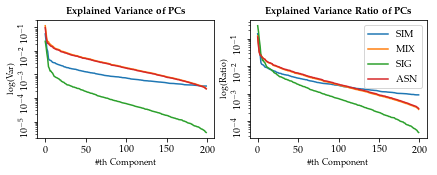

In [56]:
f, ax = plt.subplots(1, 2, figsize=(3.49 * 2, 2.16))

ax[0].set_yscale('log')
ax[1].set_yscale('log')
#plt.plot(pca.explained_variance_)
pca = PCA(n_components=200, svd_solver='full')
pca.fit(sim_model_fr)
ax[0].plot(pca.explained_variance_, label='SIM')
ax[1].plot(pca.explained_variance_ratio_, label='SIM')

pca = PCA(n_components=200, svd_solver='full')
pca.fit(mix_model.vectors)
ax[0].plot(pca.explained_variance_, label='MIX')
ax[1].plot(pca.explained_variance_ratio_, label='MIX')
pca = PCA(n_components=200, svd_solver='full')
pca.fit(sig_model.vectors)
ax[0].plot(pca.explained_variance_, label='SIG')
ax[1].plot(pca.explained_variance_ratio_, label='SIG')
pca = PCA(n_components=200, svd_solver='full')
pca.fit(asn_model.vectors)
ax[0].plot(pca.explained_variance_, label='ASN')
ax[1].plot(pca.explained_variance_ratio_, label='ASN')
ax[1].legend(loc=1)
ax[0].set_title(r'\textbf{Explained Variance of PCs}', fontsize=10)
ax[1].set_title(r'\textbf{Explained Variance Ratio of PCs}', fontsize=10)
ax[0].set_ylabel(r'log(Var)', fontsize=9)
ax[0].set_xlabel(r'\#th Component', fontsize=9)
ax[1].set_ylabel(r'log(Ratio)', fontsize=9)
ax[1].set_xlabel(r'\#th Component', fontsize=9)
ax[1].tick_params(axis='y', labelrotation=90)
ax[0].tick_params(axis='y', labelrotation=90)
#ax[0].set_yticklabels(ax[0].get_yticklabels(), =90)

plt.show()

f.savefig("FreDecorVarRatio.pdf", bbox_inches='tight')

In [277]:
ref_model = ["fr-pos-wsrel.dataset", "fr-pos-simlex.dataset"]

model = gensim.models.KeyedVectors.load_word2vec_format(asn_model_path, binary=False)
for ref in ref_model:
    print ("ref: %s---dim: %d---------------------"%(ref, dim))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/French_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])     
    # print("OOV", res[2])        

ref: fr-pos-wsrel.dataset---dim: 300---------------------
Pearson, r 0.062083801362663324 p 0.34335030614080586
Spearman, r 0.03925785048687598 p 0.5492840044328924
ref: fr-pos-simlex.dataset---dim: 300---------------------
Pearson, r 0.06657221609421742 p 0.04574722936714159
Spearman, r 0.04327119328442837 p 0.1944036821227507


In [278]:
ref_model = ["fr-pos-wsrel.dataset", "fr-pos-simlex.dataset"]

model = gensim.models.KeyedVectors.load_word2vec_format(sig_model_path, binary=False)
for ref in ref_model:
    print ("ref: %s---dim: %d---------------------"%(ref, dim))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/French_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])     
    # print("OOV", res[2])        

ref: fr-pos-wsrel.dataset---dim: 300---------------------
Pearson, r 0.024092563909542758 p 0.7133087416442092
Spearman, r 0.0019982620398572367 p 0.9756926441220919
ref: fr-pos-simlex.dataset---dim: 300---------------------
Pearson, r 0.27146922317450983 p 1.0994384724435082e-16
Spearman, r 0.3106984264094054 p 1.2902266797393171e-21


In [282]:
ref_model = ["fr-pos-wsrel.dataset", "fr-pos-simlex.dataset"]

model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'mix_embedding.txt', binary=False)
for ref in ref_model:
    print ("ref: %s---dim: %d---------------------"%(ref, dim))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/French_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])     
    print("OOV", res[2])        

ref: fr-pos-wsrel.dataset---dim: 300---------------------
Pearson, r 0.1273298604055749 p 0.05124005880172186
Spearman, r 0.09292796943891386 p 0.15559681838906625
OOV 7.114624505928854
ref: fr-pos-simlex.dataset---dim: 300---------------------
Pearson, r 0.09726590144804816 p 0.0034725976201056
Spearman, r 0.09179664928930993 p 0.005825810359922543
OOV 7.967313585291114


# LPP Specific Test

In [81]:
ref_model = ["fr-pos-wsrel.dataset", "fr-pos-simlex.dataset"]

model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'sim_56k_634d.txt', binary=False)

In [51]:
for idx2, ref in enumerate(ref_model):
    print ("ref: %s---dim: %d---------------------"%(ref, model.vector_size))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/French_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])   

ref: fr-pos-wsrel.dataset---dim: 634---------------------
Pearson, r 0.10390990957941862 p 0.10613322593026263
Spearman, r 0.051152611689551944 p 0.4273126934361545
ref: fr-pos-simlex.dataset---dim: 634---------------------
Pearson, r 0.32910498528693743 p 5.571000169726239e-25
Spearman, r 0.2812101536274285 p 2.1215623361628103e-18


In [82]:
# Dimension selected in LPP 
reg_str = "sim_dim634_voc56665_d1 sim_dim634_voc56665_d2 sim_dim634_voc56665_d3 sim_dim634_voc56665_d4 sim_dim634_voc56665_d5 sim_dim634_voc56665_d6 sim_dim634_voc56665_d7 sim_dim634_voc56665_d8 sim_dim634_voc56665_d9 sim_dim634_voc56665_d10 sim_dim634_voc56665_d11 sim_dim634_voc56665_d12 sim_dim634_voc56665_d13 sim_dim634_voc56665_d14 sim_dim634_voc56665_d15 sim_dim634_voc56665_d16 sim_dim634_voc56665_d17 sim_dim634_voc56665_d18 sim_dim634_voc56665_d19 sim_dim634_voc56665_d20 sim_dim634_voc56665_d21 sim_dim634_voc56665_d22 sim_dim634_voc56665_d23 sim_dim634_voc56665_d24 sim_dim634_voc56665_d25 sim_dim634_voc56665_d26 sim_dim634_voc56665_d27 sim_dim634_voc56665_d28 sim_dim634_voc56665_d29 sim_dim634_voc56665_d30 sim_dim634_voc56665_d31 sim_dim634_voc56665_d32 sim_dim634_voc56665_d33 sim_dim634_voc56665_d34 sim_dim634_voc56665_d35 sim_dim634_voc56665_d36 sim_dim634_voc56665_d37 sim_dim634_voc56665_d38 sim_dim634_voc56665_d39 sim_dim634_voc56665_d40 sim_dim634_voc56665_d41 sim_dim634_voc56665_d42 sim_dim634_voc56665_d43 sim_dim634_voc56665_d44 sim_dim634_voc56665_d45 sim_dim634_voc56665_d46 sim_dim634_voc56665_d47 sim_dim634_voc56665_d48 sim_dim634_voc56665_d49 sim_dim634_voc56665_d50 sim_dim634_voc56665_d51 sim_dim634_voc56665_d52 sim_dim634_voc56665_d53 sim_dim634_voc56665_d54 sim_dim634_voc56665_d55 sim_dim634_voc56665_d56 sim_dim634_voc56665_d57 sim_dim634_voc56665_d58 sim_dim634_voc56665_d59 sim_dim634_voc56665_d60 sim_dim634_voc56665_d61 sim_dim634_voc56665_d62 sim_dim634_voc56665_d63 sim_dim634_voc56665_d64 sim_dim634_voc56665_d65 sim_dim634_voc56665_d66 sim_dim634_voc56665_d67 sim_dim634_voc56665_d68 sim_dim634_voc56665_d69 sim_dim634_voc56665_d70 sim_dim634_voc56665_d71 sim_dim634_voc56665_d72 sim_dim634_voc56665_d73 sim_dim634_voc56665_d74 sim_dim634_voc56665_d75 sim_dim634_voc56665_d76 sim_dim634_voc56665_d77 sim_dim634_voc56665_d78 sim_dim634_voc56665_d79 sim_dim634_voc56665_d80 sim_dim634_voc56665_d81 sim_dim634_voc56665_d82 sim_dim634_voc56665_d83 sim_dim634_voc56665_d84 sim_dim634_voc56665_d85 sim_dim634_voc56665_d87 sim_dim634_voc56665_d88 sim_dim634_voc56665_d89 sim_dim634_voc56665_d90 sim_dim634_voc56665_d91 sim_dim634_voc56665_d92 sim_dim634_voc56665_d93 sim_dim634_voc56665_d94 sim_dim634_voc56665_d96 sim_dim634_voc56665_d97 sim_dim634_voc56665_d99 sim_dim634_voc56665_d100 sim_dim634_voc56665_d103 sim_dim634_voc56665_d117 sim_dim634_voc56665_d131"
regs = reg_str.split()
dims = []
for reg in regs:
    dims.append(int(reg.rsplit('_d')[2]))
    
dims = np.array(dims)
model.vectors = model.vectors[:, dims]
#model.vectors_norm = model.vectors_norm[:, :dims]
model.vector_size = len(dims)

In [83]:
dims = np.array(dims)
model.vectors = model.vectors[:, dims]
#model.vectors_norm = model.vectors_norm[:, :dims]
model.vector_size = len(dims)

TypeError: 'NoneType' object is not subscriptable

In [54]:
for idx2, ref in enumerate(ref_model):
    print ("ref: %s---dim: %d---------------------"%(ref, model.vector_size))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/French_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])   

ref: fr-pos-wsrel.dataset---dim: 100---------------------
Pearson, r 0.0488015663730931 p 0.4488881787358334
Spearman, r 0.02648772337589506 p 0.6811855975364525
ref: fr-pos-simlex.dataset---dim: 100---------------------
Pearson, r 0.3157107438578365 p 5.131528756665213e-23
Spearman, r 0.2625170138821844 p 3.735428799909342e-16


In [ ]:
results = np.zeros((21, 2, 2, 2))
for idx, dim in enumerate(range(45, 4, -2)):
    model.vectors = model.vectors[:, :dim]
    model.vectors_norm = model.vectors_norm[:, :dim]
    model.vector_size = dim
    for idx2, ref in enumerate(ref_model):
        print ("ref: %s---dim: %d---------------------"%(ref, model.vector_size))
        refp = "/home/sying/Documents/WordNetEmbeddings/data/input/French_testset/" + ref
        res = model.evaluate_word_pairs(refp, delimiter=';')
        results[idx, idx2, 0, 0] = res[0][0]
        results[idx, idx2, 0, 1] = res[0][1]
        results[idx, idx2, 1, 0] = res[1][0]
        results[idx, idx2, 1, 1] = res[1][1]
        print("Pearson, r", res[0][0], 'p', res[0][1])
        print("Spearman, r", res[1][0], 'p', res[1][1])     
    # print("OOV", res[2])        

In [ ]:
ref: fr-pos-wsrel.dataset---dim: 634---------------------
Pearson, r 0.10390990957941862 p 0.10613322593026263
Spearman, r 0.051152611689551944 p 0.4273126934361545
ref: fr-pos-simlex.dataset---dim: 634---------------------
Pearson, r 0.32910498528693743 p 5.571000169726239e-25
Spearman, r 0.2812101536274285 p 2.1215623361628103e-18

ref: fr-pos-wsrel.dataset---dim: 100---------------------
Pearson, r 0.0488015663730931 p 0.4488881787358334
Spearman, r 0.02648772337589506 p 0.6811855975364525
ref: fr-pos-simlex.dataset---dim: 100---------------------
Pearson, r 0.3157107438578365 p 5.131528756665213e-23
Spearman, r 0.2625170138821844 p 3.735428799909342e-16


In [66]:
cm = plt.get_cmap('Accent')

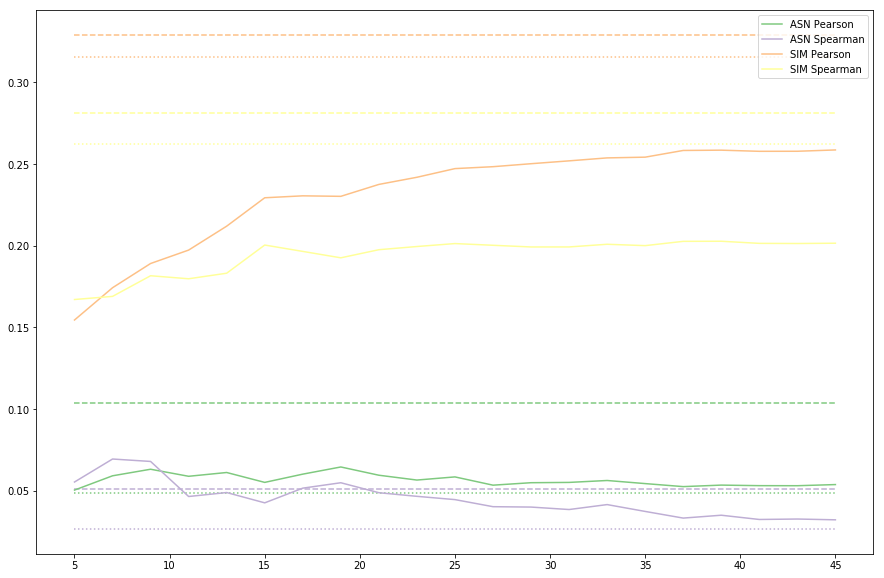

In [72]:
plt.figure(figsize=(15,10))
plt.hlines([0.10390990957941862, 0.051152611689551944, 0.32910498528693743, 0.2812101536274285, \
            0.0488015663730931, 0.02648772337589506, 0.3157107438578365, 0.2625170138821844], 5, 45, 
          colors=cm.colors[:4], linestyles=['dashed']*4+['dotted']*4)
plt.plot(range(45, 4, -2), results[:, 0, 0, 0], label='ASN Pearson', c=cm.colors[0])
plt.plot(range(45, 4, -2), results[:, 0, 1, 0], label='ASN Spearman', c=cm.colors[1])
plt.plot(range(45, 4, -2), results[:, 1, 0, 0], label='SIM Pearson', c=cm.colors[2])
plt.plot(range(45, 4, -2), results[:, 1, 1, 0], label='SIM Spearman', c=cm.colors[3])
plt.legend()
plt.show()

In [88]:
ref_model = ["fr-pos-wsrel.dataset", "fr-pos-simlex.dataset"]

model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'asn_embedding_24519.txt', binary=False)

In [90]:
for idx2, ref in enumerate(ref_model):
    print ("ref: %s---dim: %d---------------------"%(ref, model.vector_size))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/French_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])   

ref: fr-pos-wsrel.dataset---dim: 200---------------------
Pearson, r 0.11157418681064848 p 0.08789413606529137
Spearman, r 0.15664118141033603 p 0.016247220815948968
ref: fr-pos-simlex.dataset---dim: 200---------------------
Pearson, r 0.06291620230137814 p 0.05905506655177261
Spearman, r 0.07710406040568947 p 0.02063263946877119


/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [60]:
ref_model = ["fr-pos-wsrel.dataset", "fr-pos-simlex.dataset"]
model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'sig_embedding_24519.txt', binary=False)

In [61]:
for idx2, ref in enumerate(ref_model):
    print ("ref: %s---dim: %d---------------------"%(ref, model.vector_size))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/French_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])   

ref: fr-pos-wsrel.dataset---dim: 200---------------------


/home/sying/root/anaconda3/envs/micipsa/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Pearson, r -0.004453977099069999 p 0.9458537449428723
Spearman, r -0.007823366954286048 p 0.9050438015391404
ref: fr-pos-simlex.dataset---dim: 200---------------------
Pearson, r 0.2541265686844514 p 9.562952354592692e-15
Spearman, r 0.31208995136052176 p 8.3449300626506e-22


In [62]:
ref_model = ["fr-pos-wsrel.dataset", "fr-pos-simlex.dataset"]
model = gensim.models.KeyedVectors.load_word2vec_format(root_path + 'mix_embedding_24519.txt', binary=False)

In [63]:
for idx2, ref in enumerate(ref_model):
    print ("ref: %s---dim: %d---------------------"%(ref, model.vector_size))
    refp = "/home/sying/Documents/WordNetEmbeddings/data/input/French_testset/" + ref
    res = model.evaluate_word_pairs(refp, delimiter=';')
    print("Pearson, r", res[0][0], 'p', res[0][1])
    print("Spearman, r", res[1][0], 'p', res[1][1])   

ref: fr-pos-wsrel.dataset---dim: 200---------------------
Pearson, r 0.15201656697320495 p 0.019726466511496937
Spearman, r 0.20784375651537762 p 0.0013541052113862592
ref: fr-pos-simlex.dataset---dim: 200---------------------
Pearson, r 0.0940634642458028 p 0.004715989903415893
Spearman, r 0.14492391213966774 p 1.258678280888317e-05


In [76]:
results = np.zeros((21, 2, 2, 2))
for idx, dim in enumerate(range(45, 4, -2)):
    model.vectors = model.vectors[:, :dim]
    model.vectors_norm = model.vectors_norm[:, :dim]
    model.vector_size = dim
    for idx2, ref in enumerate(ref_model):
        print ("ref: %s---dim: %d---------------------"%(ref, model.vector_size))
        refp = "/home/sying/Documents/WordNetEmbeddings/data/input/French_testset/" + ref
        res = model.evaluate_word_pairs(refp, delimiter=';')
        results[idx, idx2, 0, 0] = res[0][0]
        results[idx, idx2, 0, 1] = res[0][1]
        results[idx, idx2, 1, 0] = res[1][0]
        results[idx, idx2, 1, 1] = res[1][1]
        print("Pearson, r", res[0][0], 'p', res[0][1])
        print("Spearman, r", res[1][0], 'p', res[1][1])     
    # print("OOV", res[2])        

ref: fr-pos-wsrel.dataset---dim: 45---------------------
Pearson, r 0.04732950987809014 p 0.4702430447915138
Spearman, r 0.08240403594719004 p 0.2081619058947332
ref: fr-pos-simlex.dataset---dim: 45---------------------
Pearson, r 0.07336462570950766 p 0.027660216465077384
Spearman, r 0.07773519189026616 p 0.019614385287863325
ref: fr-pos-wsrel.dataset---dim: 43---------------------
Pearson, r 0.04086761252001157 p 0.5330160616451984
Spearman, r 0.07624511678177164 p 0.24431108945700758
ref: fr-pos-simlex.dataset---dim: 43---------------------
Pearson, r 0.0709508439624717 p 0.033218281285213765
Spearman, r 0.07070409855888245 p 0.03383682064212477
ref: fr-pos-wsrel.dataset---dim: 41---------------------
Pearson, r 0.040314822304558934 p 0.538575050369253
Spearman, r 0.071285524717554 p 0.27644300246745707
ref: fr-pos-simlex.dataset---dim: 41---------------------
Pearson, r 0.07337305539297807 p 0.027642303220788395
Spearman, r 0.07248493339281206 p 0.02958536063576334
ref: fr-pos-wsre

In [ ]:
ref: fr-pos-wsrel.dataset---dim: 200---------------------
Pearson, r 0.11157418681064848 p 0.08789413606529137
Spearman, r 0.15664118141033603 p 0.016247220815948968
ref: fr-pos-simlex.dataset---dim: 200---------------------
Pearson, r 0.06291620230137814 p 0.05905506655177261
Spearman, r 0.07710406040568947 p 0.02063263946877119


In [66]:
cm = plt.get_cmap('Accent')

In [79]:
list(range(45, 4, -2))[results[:, 0,0,0].argmax()]

13

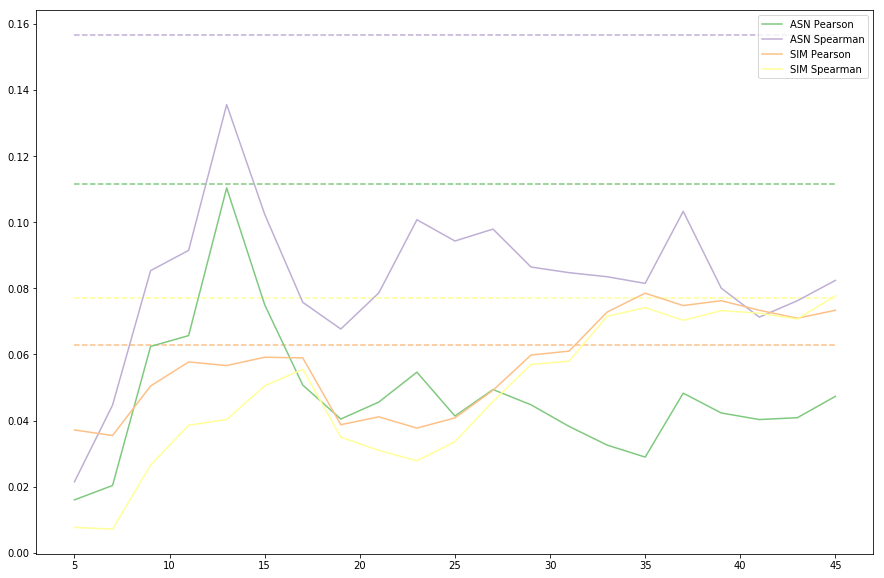

In [77]:
plt.figure(figsize=(15,10))
plt.hlines([0.11157418681064848,  0.15664118141033603, 0.06291620230137814, 0.07710406040568947],
           5, 45, colors=cm.colors[:4], linestyles='dashed')
plt.plot(range(45, 4, -2), results[:, 0, 0, 0], label='ASN Pearson', c=cm.colors[0])
plt.plot(range(45, 4, -2), results[:, 0, 1, 0], label='ASN Spearman', c=cm.colors[1])
plt.plot(range(45, 4, -2), results[:, 1, 0, 0], label='SIM Pearson', c=cm.colors[2])
plt.plot(range(45, 4, -2), results[:, 1, 1, 0], label='SIM Spearman', c=cm.colors[3])
plt.legend()
plt.show()